<a href="https://colab.research.google.com/github/ReyFrank92/joyofcoding/blob/main/TF2_0_Simple_RNN_Sine.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [69]:
#Install TensorFlow
!pip install -q tensorflow-gpu==2.0.0
import tensorflow as tf
print(tf.__version__)

2.9.1


Note: recurernt loop implies a time delay of 1

helpfull subcripts,

x = input,

h = hidden,

o = output,

xh = input-to-hidden,

hh = hidden-to-hideen,

Practicamente las diferencias entre ann  y rnn es el componente de rezago t-1
h0 is the initial hidden state and it can be a learned parameter.

In tensorflow, it's not leanrable- just assume it's zero

Pseudocode

Wxh - input to hidden weight

Xhh - hidden to hiiden weight

bh - hidden bias

Wo - hidden to output weight

bo - output bias

X - TxD input matrix 

tanh hidden activation

softmax output activation 

YHat =[]
h_last= h0
for t in range (T):
  h_t = tan[t].dot(Wx) + h_last.dot(Wh) + bh)
  yhat = softmax(h_t.dot(Wo) + bo
  Yhat.append(yhat)

  #important, don't foget to update h_last
  h_last = h_t

CNNs have "shared weights" to take advantages of structure, resulting in savings- let's see how RNNs do the same

from tensorflow.keras.layers import Input, SimpleRNN, Dense

i = Input(shape=(T,1))
x = SimpleRNN(5, activation='relu')(i)
x = Dense (1)(x)
model = Model (i,x)

Train and evaluation is the same
al final cuando aparezca:
model.predict(x.reshape(1,T,1))[0,0] Los ceros significan que van a tomar el valor como escalar. adem+ás, en este caso son 3 dimensiones, 

recuerda NxTxD, output will be N x K. N=1, D=1, K=1

In [70]:
from tensorflow.keras.layers import Input, SimpleRNN, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

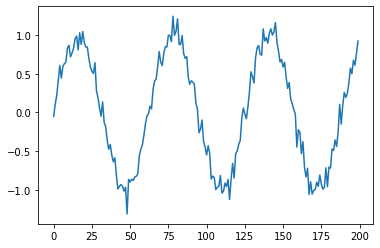

In [71]:
#make the original data
series = np.sin(0.1*np.arange(200)) + np.random.randn(200)*0.1 #quitar o no quitar si queremos probar con o sin ruido

#Plot it
plt.plot(series)
plt.show()

In [81]:
### Build the dataset []
# let's see if we can use T past values to predict the next value
T = 10 # to use 10 previous times step to predict the next time stack
D = 1 ## En RNN agrego esto porque los RNN son de 3 dimensiones
X = []
Y = []
for t in range(len(series) - T): #lo que mida la serie -10
  x = series [t:t+T] # cuando t = 1, entonces corre de 1 a 11, cuando es 2 , corre de 2 a 12 ya si (en la primera iteración irá de 0 a 9 porque T =10)
  X.append(x) #Se anexa el x al final 
  y = series [t+T] #si t  = 3 entonces es 13. i.e. se busca la observación 13 estando en el 3.
  Y.append(y) #Se anexa el y al final

#Final target index
 # = Final t + T
 # [len(series) - T - 1] + T
 # len(series) -1 

X = np.array(X).reshape(-1,T,1) #  N X T x D . #Una vez que tienes un array, ahora transpones los arrays de tal forma que tenga T(osea 10) cada una, los -1 sirven si no sabes cuando hay en algo pero la pc los acomoda automaticamente
Y = np.array(Y) #Se crea un array con los valore Y
N = len(X) #el número de items en X
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (190, 10, 1) Y.shape (190,)


In [73]:
print(X)#los 190 de 10 en 10 pero dimensionados en una 3 dimensión de 1 array

[[[-0.0502525 ]
  [ 0.10683386]
  [ 0.21967404]
  ...
  [ 0.62989653]
  [ 0.64735528]
  [ 0.82988984]]

 [[ 0.10683386]
  [ 0.21967404]
  [ 0.41044698]
  ...
  [ 0.64735528]
  [ 0.82988984]
  [ 0.86609698]]

 [[ 0.21967404]
  [ 0.41044698]
  [ 0.60610095]
  ...
  [ 0.82988984]
  [ 0.86609698]
  [ 0.71686078]]

 ...

 [[ 0.10543636]
  [-0.14901073]
  [ 0.09299798]
  ...
  [ 0.5717368 ]
  [ 0.49902372]
  [ 0.67345933]]

 [[-0.14901073]
  [ 0.09299798]
  [ 0.25927821]
  ...
  [ 0.49902372]
  [ 0.67345933]
  [ 0.61025096]]

 [[ 0.09299798]
  [ 0.25927821]
  [ 0.19371353]
  ...
  [ 0.67345933]
  [ 0.61025096]
  [ 0.76496365]]]


In [82]:
#try autoregressive RNN model []
i = Input(shape=(T,1)) #es solo poner una entrada, en este caso 10 porque es la primera capa y uno busca un AR(10) #Aca si se pone (T,1)
x = SimpleRNN(5, activation = 'relu')(i) #simpleRNN(5,activation='relu')(i) # el por defecto es un tanh
x = Dense(1)(x) #final layer is one #solo es una capa. 
model = Model(i, x)
model.compile(
    loss='mse',
    optimizer=Adam(lr=0.1),
)

# train the RNN
r = model.fit(
  X[:-N//2], Y[:-N//2], # si fuera _1 , signfica que la borra la última observacion,entonces -N borra todo pero //2 significa que toma última mitad de los datos
  epochs = 80,
  validation_data=(X[-N//2:], Y[-N//2:]), #valida con los mismos datos
)

# Select the last element in the list
# (the slice starts at the last element, and ends at the end of the list)
# surveys_df[-1:]

Epoch 1/80


/usr/local/lib/python3.7/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


3/3 [==============================] - 1s 138ms/step - loss: 0.0939 - val_loss: 0.0552
Epoch 2/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0448 - val_loss: 0.0243
Epoch 3/80
3/3 [==============================] - 0s 22ms/step - loss: 0.0253 - val_loss: 0.0339
Epoch 4/80
3/3 [==============================] - 0s 29ms/step - loss: 0.0237 - val_loss: 0.0282
Epoch 5/80
3/3 [==============================] - 0s 19ms/step - loss: 0.0251 - val_loss: 0.0269
Epoch 6/80
3/3 [==============================] - 0s 28ms/step - loss: 0.0201 - val_loss: 0.0269
Epoch 7/80
3/3 [==============================] - 0s 20ms/step - loss: 0.0225 - val_loss: 0.0263
Epoch 8/80
3/3 [==============================] - 0s 23ms/step - loss: 0.0198 - val_loss: 0.0292
Epoch 9/80
3/3 [==============================] - 0s 25ms/step - loss: 0.0196 - val_loss: 0.0279
Epoch 10/80
3/3 [==============================] - 0s 24ms/step - loss: 0.0201 - val_loss: 0.0321
Epoch 11/80
3/3 [======================

In [75]:
model.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 10, 1)]           0         
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 5)                 35        
                                                                 
 dense_9 (Dense)             (None, 1)                 6         
                                                                 
Total params: 41
Trainable params: 41
Non-trainable params: 0
_________________________________________________________________


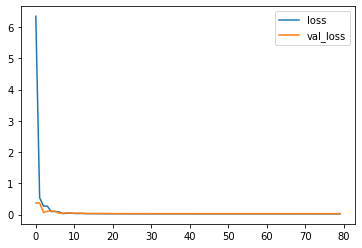

In [76]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

In [77]:
## "Wrong" forecast using true targets
validation_target = Y[-N//2:]
validation_predictions = []

 #index of first validation input
i = -N//2 # acá el i es el número que corre de la mitad de los 2 hacia adelante 

while len(validation_predictions) < len(validation_target): 
  p = model.predict(X[i].reshape(1,-1))[0,0] #1x1 array --> scalar 
  i += 1 #incrementa i de 1 en 1 por cada iteración 

  # update the prediction list
  validation_predictions.append(p)

1/1 [==============================] - 0s 28ms/step


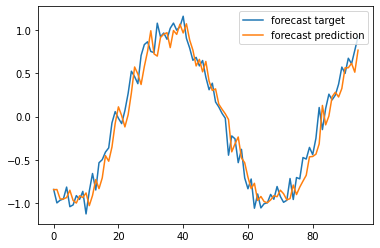

In [78]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

In [83]:
##The correct form[]
# forecast future values (use only self-predictions for making future predictions)

validation_target = Y[-N//2:] #Selecciona la ultima mitad de las observaciones a predecir(variable dependiente)
validaiton_predictions = []

#last train input
last_x = X[-N//2] # 1-D array of lenght T. toma la última mitad de las observaciones (variable independiente)

while len(validation_predictions) < len(validation_target): #este bucle está mientras el numero de predicciones sea menor a las observaciones de la variable dependiente
  p = model.predict(last_x.reshape(1,-1, 1))[0,0] # 1x1 array -> scalar. se define la variable p como la predicción donde se va a guardar el resultado (escalar obvio)
  
  #update the prediction list
  validation_predictions.append(p) #cada resultado lo va guardando en la lista
 
  #the make the new input
  last_x = np.roll(last_x,-1) #Vamos a hacer un shift, ponemos la priemera observacion de X como si fuera la última, esto hace que se mueva hacia atras (-1)
  last_x[-1] = p #Aquí lo chido es que sustituimos la última observacion con el p, osea con la predicción que nos da

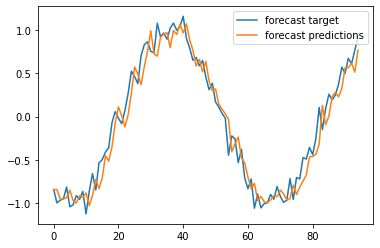

In [84]:
plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions,label ='forecast predictions')
plt.legend()